# Nova seção

# Lição 04: RMS Metter

Text(0, 0.5, 'Amplitude')

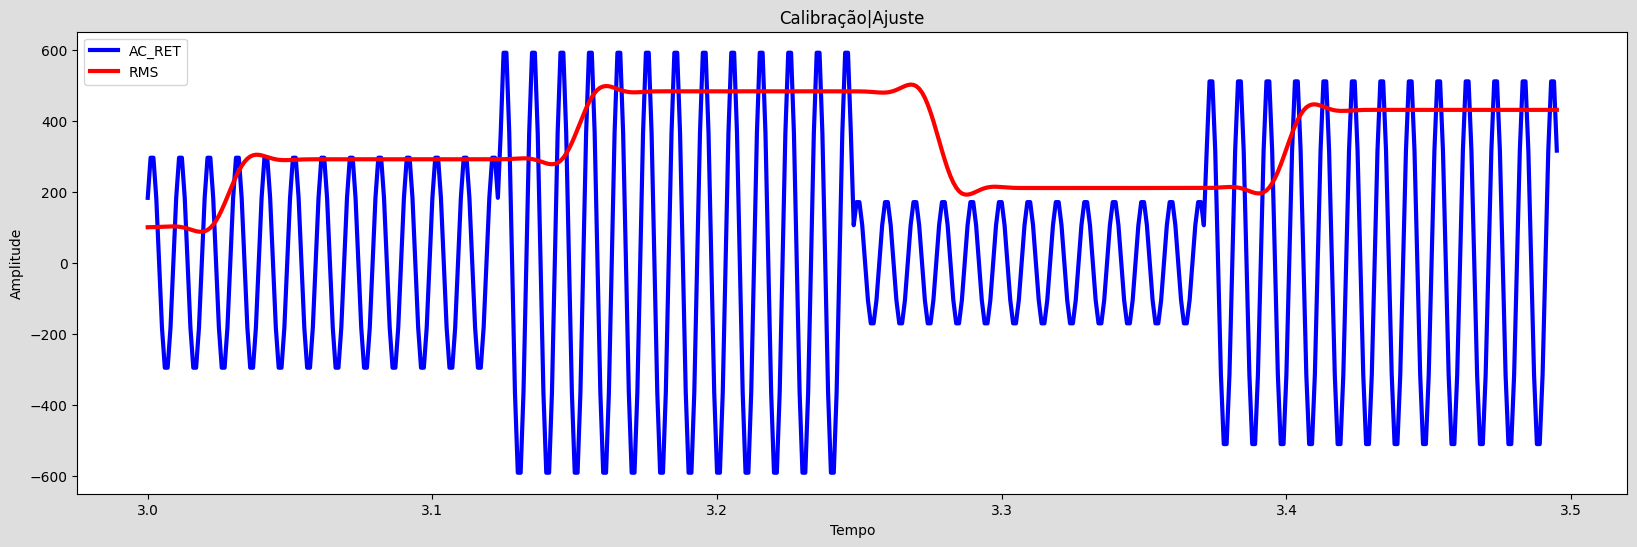

In [1]:
from math import floor, sqrt
from numpy import cos, sin, pi, absolute, array, arange, size, append, concatenate
from pylab import subplots, figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show, legend
from scipy.signal import firwin, lfilter

# Setup da Simulação
GridFreq = 100 #Nominal Grid Frequency in Hz
Fs       = 1000 #Sampling frequency = 1Khz
Ts       = 1/Fs #Sampling Time = 1/Fs
Tfinal   = 3.5 #Time the simulation
t        = arange(3,Tfinal,Ts) #Simulation Time vector
w        = 2*pi*GridFreq #Frequencia Angular
# Gera pontos como se estivesse lendo tensões alternadas.
u1,u2,u3,u4 = array([]), array([]), array([]), array([])
for n in range(1,floor(size(t)/4)):
  u1 = append(u1, 220*sqrt(2)*sin(w*(n*Ts))) #Pontos de 311.12
  u2 = append(u2, 440*sqrt(2)*sin(w*(n*Ts))) #Pontos de 622.25
  u3 = append(u3, 127*sqrt(2)*sin(w*(n*Ts))) #Pontos de 179.60
  u4 = append(u4, 380*sqrt(2)*sin(w*(n*Ts))) #Pontos de 537.40

supplyVoltage = concatenate((u1, u2, u3, u4))

h = firwin(60, cutoff = 0.1, window = "hamming", pass_zero = True) # Filtro passa Baixa (fc = 0.1fs)
# a = signal.firwin(n, cutoff = [0.2, 0.5], window = 'hanning', pass_zero = False) # Filtro Passa Faixa
# a = signal.firwin(n, cutoff = [0.2, 0.5], window = 'hanning', pass_zero = True) # Filtro Rejeita Faixa
# a = signal.firwin(n, cutoff = 0.3, window = "hanning", pass_zero=False) # Filtro Passa Alta
rmsVoltage = lfilter(h,1,abs(supplyVoltage)) # Aplica o filtro sobre a entrada x resultando em y
# Faz o ajuste a partir de uma calibração.
VCAL_M = 1; VCAL_B = 100;
V_RATIO = VCAL_M*rmsVoltage+VCAL_B;

fig, ax = subplots(figsize=(20,6), facecolor='#DEDEDE')
title("Calibração|Ajuste");
line1,line2 = ax.plot(t[:size(supplyVoltage)],supplyVoltage,'b',t[:size(supplyVoltage)],V_RATIO,'r',linewidth=3)
legend([line1,line2],["AC_RET","RMS"]);
xlabel('Tempo')
ylabel('Amplitude')